### Assignment #1

### Nuclear Physics II

### Instructor: Prof. Sean Dobbs

### February 2nd, 2024

*Due by 11 PM, February 19th*

## Guidelines

You will be asked to solve several problems, some of which will be short answers or derivations, some of which will be computational. For the short answer problems, please submit them in some digital form (PDF, JPEG, scanned files, etc.).  For the computational problems, please submit both the answers to the questions and the code that you used to generate these answers.  While any sample code provided will be in python, you can submit programs in any programming language you like, provided that I can compile and run the programs.  You are **strongly** encouraged to use python.  Any figures should be properly labeled, with descriptive axis labels, and either a legend, or a caption describing the contents. You can also use any commonly used HENP packages such as ROOT, as long as I can access them.  If you have any uncertainty on these topics, please ask.


You will be evaluated based on the files contained in your remote GitHub repository at the due date.  You should and commit all the files you created to your local repository on a regular basis. You should do this by adding any new or modified files using "git add", and then finalizing changes using "git commit".  Remember that "git status" will give you information on which files in your repository. have been changed.  Remember to add short, but useful comments when performing a commit. When you are finished with the exercise, push the current status of your local repository to the remote repository on GitHub using the command "git push -u". You are encouraged to push your local files to the remote repository periodically before you are done, and certainly well before the deadline, if possible.

Please also remember to cite code copied from the book or internet, and note if you worked closely with another student.  Citations matter and are good practice!  Please do not use ChatGPT or other generative AI.

## 1. Allowed and Forbidden Decays

State if these reactions or decays are allowed or forbidden to proceed via the strong interaction, and why.
1. $p + p \to n + \bar{n}$
2. $K^+ + n \to \Sigma^+ + \pi^0$
3. $d + d \to \mathrm{He} + \pi^0$
4. $\pi^- + p \to \Lambda + K0$
5. $\Xi^- \to \Sigma^0 + K^-$
6. $\omega \to \eta \pi^0$
7. $\rho^0 \to \eta \pi^0$

## 2. Isospin Ratios

For a particular center-of-mass energy, use isospin considerations to determine the relative ratio between the cross sections for these three reactions:
1. $\pi^- + p \to K^0 \Sigma^0$
2. $\pi^- + p \to K^+ \Sigma^-$ 
3. $\pi^+ + p \to K^+ \Sigma^+$

## 3.  Determining the parity of the $\Xi^-$

In principle, we can determine the spin of the $\Xi^-$ baryon by measuring the following reaction from $\Xi^-$ baryons stopping in a hydrogen target:
$$\Xi^- + p \to \Lambda^0 + \Lambda^0$$
Since the $\Xi^-$ baryons are stopping in the target, the process proceeds through an S-wave, so the relative orbital angular momentum between the $\Xi^- + p$ is zero.  Remember that we can measure the polarization of the $\Lambda^0$ through the angular distribution $\Lambda^0 \to p + \pi^-$ decays.

Show how the relative spin orientation of the two $\Lambda^0$ (i.e. their total spin state) depends on the parity of the $\Xi^-$.


## 4. Modeling Radioactive Decay Chains

In Physics, the term "Monte Carlo" refers to any use of random sampling to solve a problem.  Since computers are very efficient at generating (pseudo-)random numbers with specific distributions, they are good tools to solve problems with this method.  Monte Carlo methods are particularly good for numerical integration or drawing from a probability distribution.  They are therefore particularly good at simulating quantum systems, and simulating repeated, statistically independent measurements of a system - which describes most experiments in nuclear and hadronic physics. 

To start off with an example of how to use random numbers in a calculation, let's consider modeling a radioactive decay.  The isotope $^{208}$Tl decays to $^{208}$Pb with a half-life of 3.053 minutes.  We can look at the properties of this decay process by starting with a sample of these atoms and simulating their decay over time, using random numbers to simulate the randomness of the radioactive decay.

We know that on average the number of atoms $N$ declines exponentially over time:
$$N(t) = N(0)\,2^{-t/\tau}$$
where $\tau$ is the half-life for the decay.  This means that the probability $p(t)$ that any particular atom has decayed at time $t$ is one minus this probability:
$$p(t) = 1 - 2^{-t/\tau}$$
As an example, we can start with a sample of 1000 atoms of $^{208}$Tl, define a time frame to study, and divide it into 1 second increments.  In each time step, we consider each of the $^{208}$Tl atoms, and decide whether or not it decays, and keep a running total of how many $^{208}$Tl and $^{208}$Pb atoms we have.  Here is an example of this calculation:

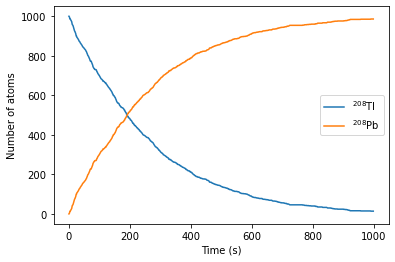

In [2]:
# Adapted from "Computational Physics", M. Newman, Ex.10.1
from random import random
from numpy import arange
from pylab import plot,xlabel,ylabel,show,legend

# Constants
NTl = 1000            # Number of thallium atoms
NPb = 0               # Number of lead atoms
tau = 3.053*60        # Half life of thallium in seconds
h = 1.0               # Size of time-step in seconds
p = 1. - 2.**(-h/tau)   # Probability of decay in one step
tmax = 1000           # Total time

# Lists of plot points
tpoints = arange(0.0,tmax,h)
Tlpoints = []
Pbpoints = []

# Main loop
for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)

    # Calculate the number of atoms that decay
    decay = 0
    for i in range(NTl):
        # note that random.random() returns a uniformly distributed number in the range [0,1]
        if random()<p:
            decay += 1
    NTl -= decay
    NPb += decay

# Make the graph
plot(tpoints,Tlpoints,label='$^{208}$Tl')
plot(tpoints,Pbpoints,label='$^{208}$Pb')
xlabel("Time (s)")
ylabel("Number of atoms")
legend()
show()

We can generalize this to more complicated decay chains.  Consider the decay of $^{213}$Bi to the stable isotope $^{209}$Be.   This process goes through the following decays:
*  $^{213}$Bi decays with a half-life of 46 min, 97.91% of the time to $^{209}$Pb, and 2.09% of the time to $^{209}$Tl.
* $^{209}$Tl will decay 100% of the time to $^{209}$Pb with a half-life of 2.2 min
* $^{209}$Pb will decay 100% of the time to $^{213}$Bi with a half-life of 3.3 min

Write a program that simulates this decay chain for 10,000 atoms of $^{213}$Bi, using time slices of $\delta t=1$.  You should follow this bottom-up approach (to avoid the chance that one particle decays twice in one time slice):
1. For each atom of $^{209}$Pb, decide at random (with the appropriate probability), if the atom decays or not.
2. For each atom of $^{209}$Tl, decide at random if the atom decays or not.
3. For each atom of $^{213}$Bi, decide at random if the atom decays or not, and randomly choose with decay path to take with the appropriate probability.

Keep track of the number of atoms of each isotope at each time step, and make a single graph showing four curves, showing how each of these varies over time.

## 5. Exploring Kinematics Using Monte Carlo Calculations

One way to generate events that are distributed in a non-uniform way is through the sampling or "accept/reject" method.  It's most straight forward to think about the one dimensional case.  For selecting events from a multi-dimensional distribution, we can generally sample one dimension at a time.  

If we are given a function to sample events from over a given range, first, think about plotting $f(x)$ vs. $x$.  Next, draw a box defined by the positive and negative values of the $x$ range, and the maximum value of $f(x)$ (and maybe the minimum value as well, if it drops below zero).  Next, generate a random pair of values $(x,y)$ uniformly distributed over the box.  Finally, keep the event with valye $x$ if it satisfies $y<f(x)$, otherwise through it away and generate another uniformly distributed event. Keep on going until you have as many events as you want.

Below is an example of generating events with a to $1+\cos^2\theta$ distribution, where $\theta$ is the polar angle in spherical coordinates.  The distribution of events is plotted, along with a red curve that corresponds to the expected distribution that the events are being drawn from (properly normalized to the number of events generated).

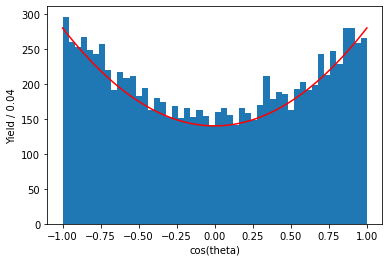

In [42]:
from random import random,uniform
import matplotlib.pyplot as plt
import numpy as np
import math

N = 10000
b = 100.

# simulate events
data = []
for x in range(N):
    while 1:
        costheta = uniform(-1,1)  # sample uniformly in cos(theta)
        r1 = 2.*random()         # should we keep the event or not?
        if(r1 < 1+costheta**2):
            break
    data.append(costheta)
    
# draw the model curve, for comparison
def f(x):
        return 1 + x**2
xpts = np.linspace(-1,1,100)
        
plt.hist(data,bins=50, range=[-1,1])
plt.plot(xpts,140.*f(xpts), color='red')

plt.ylabel("Yield / 0.04")
plt.xlabel("cos(theta)")


plt.show()



We can use such techniques to generate events that can be used in more complicated simulation packages, and also to study various properties of reactions.

Let's consider the decay of a boson of rest mass 200~MeV into two massless particles.  A beam of such bosons is moving along the $z$-axis with a certain momentum.  Consider two cases of the decay: where the decay particles are generated uniform in solid angle (uniform in $\phi$ and in $\cos \theta$), and where the decay particles are generated uniform in $\phi$ and with a $1+\cos^2\theta$ distribution.  Note that these decay distributions are defined in the rest frame of the boson.

Consider three different cases: where the bosons have momenta of 300 MeV/c, 900 MeV/c, and 1.4 GeV/c in the "lab frame".  In each of these cases, compare the distributions of the energies and polar angles ($\theta$) of the decay particles under the two hypotheses (note that since this is a two-body decay, you only have to determine the orientation of one of these particles - the other is then defined by energy and momentum conservation).  For each momenta, then answer the following questions:  What is the maximum energy and polar angle of the decay products in the lab frame?  What is the minimum energy and polar angle of the decay products in the lab frame?  What is the most probable energy and polar angle of the decay products in the lab frame?  